# Lecture 5

This lecture covered linear difference equations (recurrence equations). Below one of the examples from the lecture is solved using SymPy.


## Student grant example

The difference equation for the student grant example from the lecture notes has the form

$$
y_{n} - 2.95 y_{n-1} + 2 y_{n-2} = −(63.685)(1.07^{n})
$$

We investigate and solve this equation using SymPy. As before, we first need to import SymPy. We will also import a `Fraction` object to represent fractions without Python evaluating fraction numerically.

In [1]:
from sympy import *
init_printing()
from IPython.display import display

from fractions import Fraction

We now define $n$ as an integer symbol and $y$ as a function:

In [2]:
n = Symbol("n", integer=True)
y = Function("y")

Now, we define the RHS of the difference equation:

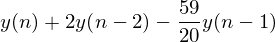

In [3]:
f = y(n) - Fraction(295, 100)*y(n - 1) + 2*y(n - 2)
display(f)

We'll now solve the homogeneous version of the equation using `rsolve`. To compare to the solution in the lecture notes, we'll also evaluate the the solution in floating point: 

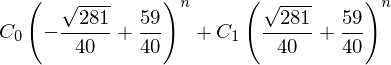

In [4]:
eqn = Eq(f, 0)
soln = rsolve(eqn, y(n))
display(soln)
soln.evalf()

The solution is the same as in the lecture notes.

We now consider the non-homogeneous case:

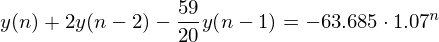

In [5]:
# Create non-homogeneous equation
eqn = Eq(f, -63.685*(1.07**n))
display(eqn)

We now solve the non-homogeneous equation, on this occasion providing the initial conditions $y(0) = 2000$ and $y(1) = 2200$:

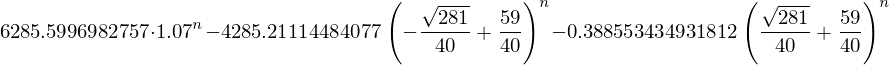

In [6]:
soln = rsolve(eqn, y(n), init={y(0) : 2000, y(1) : 2200})
display(soln)
soln.evalf()

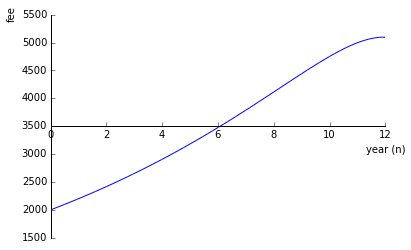

Fee after 10 years (n=10): 4749.72910622520


In [7]:
# Plot
%matplotlib inline
plot(soln, (n, 0, 12), xlabel="year (n)", ylabel="fee")

# Evaluate fee at 10 years
print("Fee after 10 years (n=10): {}".format(soln.subs(n, 10).evalf()))